# Optimisation & Simulation: Lab on MCMC methods

**Objective:**
- Use Markov chain Monte Carlo (MCMC) methods to draw from complex distributions.

**Implementation:**
- Gibbs sampling
- Metropolis-Hastings algorithm

**Agenda:**
1. Implement Gibbs sampler to generate draws from bivariate normal.
2. Implement Metropolis-Hastings algorithms to infer posterior distribution of parameters of Cauchy distribution. 

## Gibbs sampling

### Background

**Motivation and intuition:**
- Draw from multivariate distributions from which direct sampling is difficult.
- Construct conditional distributions from which sampling is easy. 
- Iteratively draw from conditional distributions. 


- Suppose we wish to sample $\theta_{1}, \theta_{2} \sim p(\theta_{1}, \theta_{2})$ but cannot do so directly. 
- However, we can sample $\theta_{1} \sim p(\theta_{1} \vert \theta_{2})$ and $\theta_{2} \sim p(\theta_{2} \vert \theta_{1})$.

**Algorithm:**
1. Set $j = 0$. 
2. Provide initial values $(\theta_{1}^{(0)}, \theta_{2}^{(0)})$. 
3. Set $j = j + 1$. 
4. $\theta_{1}^{(j)} \sim p(\theta_{1}^{(j)} \vert \theta_{2}^{(j-1)})$.
5. $\theta_{2}^{(j)} \sim p(\theta_{2}^{(j)} \vert \theta_{1}^{(j)})$.
6. If $j$ is less than the desired number of draws, return to step 3.

### Exercise
- Implement a Gibbs sampler to draw from a bivariate normal, i.e. 
$$
\begin{pmatrix}
\theta_{1} \\ \theta_{2}
\end{pmatrix}
\sim
\mathcal{N} (\boldsymbol{\mu}, \boldsymbol{\Sigma})
\text{ with }
\boldsymbol{\mu} = \boldsymbol{0},
\boldsymbol{\Sigma} = 
\begin{pmatrix}
1 & \rho \\
\rho & 1 
\end{pmatrix},
\rho = 0.8
$$
- Visually compare the empirical density of the draws to the theoretical density of the sampling distribution. 

**Note:**
- If
$$
\begin{pmatrix}
\theta_{1} \\ \theta_{2}
\end{pmatrix}
\sim
\mathcal{N} \left (\boldsymbol{0}, 
\begin{pmatrix}
1 & \rho \\
\rho & 1 
\end{pmatrix}
\right ),
$$
then 
$$
\theta_{1} \vert \theta_{2} \sim \mathcal{N}(\rho \theta_{2}, 1 - \rho^{2}),
$$
$$
\theta_{2} \vert \theta_{1} \sim \mathcal{N}(\rho \theta_{1}, 1 - \rho^{2}).
$$

#### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
def gibbs(rho, theta2, n_draws):
    """ Gibbs sampling of bivariate normal.
    
    Keywords:
        rho (float): correlation parameter.
        theta2 (float): initial value of theta2.
        n_draws (int): number of draws.
    
    Returns:
        thetas (array): draws from bivariate normal.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    thetas = np.zeros((n_draws, 2))
    for i in range(n_draws):
        theta1 = np.random.normal(rho*theta2, 1-rho**2)
        theta2 = np.random.normal(rho*theta1, 1-rho**2)
        thetas[i] = np.array([theta1, theta2])

    return thetas

In [3]:
rho = 0.8
theta2 = 0
n_draws = 1000

draws = gibbs(rho, theta2, n_draws)

# draws = draws.T

# convert to DataFrame
draws_df = pd.DataFrame(draws, columns=['theta1', 'theta2'])

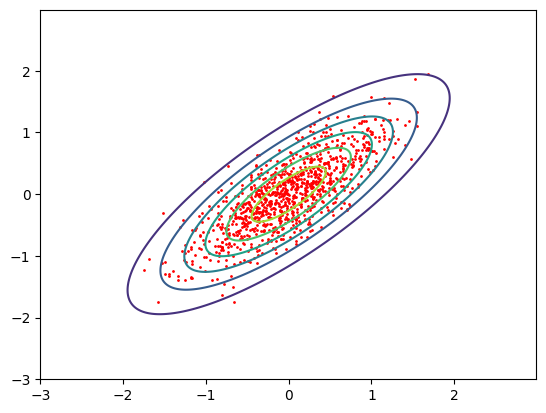

In [4]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
theta2
#Theoretical density
mu = np.array([0, 0])
Sigma = np.array([[1, rho], [rho, 1]])
x = np.arange(-3,3,0.01)
xx, yy = np.meshgrid(x,x)
z = multivariate_normal.pdf(np.stack((xx, yy), axis=2), mu, Sigma)
ax.contour(x, x, z)

# #Empirical draws
# ax = sns.kdeplot(
#     x=draws[0,:], y=draws[1,:],
#     cmap= "Blues" , shade = True
# )

# ax.set(
#     xlabel=r'$\theta_1$',
#     ylabel=r'$\theta_2$',
# )

ax = plt.scatter(draws[:,0], draws[:,1], color='red', s=1)




plt.show()

## Metropolis-Hastings algorithm

### Background

**Motivation and intuition:**
- Gibbs sampling is only feasible, if the conditional distributions are known and if it is easy to sample from them. 
- The Metropolis-Hastings algorithm allows us to sample from any density $p(\theta)$, provided that we can evaluate $f(\theta)$, a density that is proportional to $p$. 
- At each iteration, we sample a new state from a candidate distribution, which depends on the current state. 
- With some probability depending on the value of the target density at the new and the current states, the new state is accepted. 
- As the algorithm proceeds, the sampled states approximate the desired density. 

**Algorithm:**
1. Set $j = 0$.
2. Let $\theta$ denote the current state.
3. Let $p(\theta \vert x)$ denote the target density.
4. Let $J(\theta^{*} \vert \theta)$ denote the jumping distribution
5. Let $\rho$ denote the step size.
6. Set $j = j + 1$. 
7. Propose a new state $\theta^{*} \vert \theta \sim J(\theta)$.
8. Calculate $\alpha = \frac{p(\theta^{*} \vert x)}{p(\theta \vert x)} \cdot \frac{J(\theta \vert \theta^{*})}{J(\theta^{*} \vert \theta)}$.
9. Draw $r \sim \text{Uniform}(0,1)$.
10. If $r \leq \alpha$, accept the new state and set $\theta = \theta^{*}$. Otherwise, reject the new state. 
11. If $j$ is less than the desired number of draws, return to step 5.

### Exercise 
- Simulate data from Cauchy distribution with location $\mu = 1$ and scale $\gamma = 1$.
- Implement a Metroplis-Hastings algorithms to infer the posterior distribution of the scale parameter of the Cauchy distribution.
- Consider two possible jumping distributions:
- 1. $\text{Normal}(\theta, \rho^2)$, where $\rho$ is the step size.
- 2. $\text{Lognormal}(\log(\theta) - 0.5 \rho^2, \rho)$, where $\rho$ is a distance parameter. Note that $\text{Lognormal}(\mu, \sigma)$ denotes a lognormal distribution with location $\mu$ and scale $\sigma$.
- Evaluate the performance of the algorithms for different parametrisations of the jumping distributions. Compute the potential scale reduction factors $\hat{R}$ and the effective sample size $n_{\text{eff}}$.

Suppose
- $x_{i} \sim \mathcal{C}(\mu, \gamma)$ for $i \in \{1, \dots, N\}$
- $\gamma \sim \text{Gamma}(\alpha_{0}, \beta_{0})$ with $\alpha_{0} = \beta_{0} = 0.001$.

Then
$$
p(\gamma \vert x, \mu, \alpha_{0}, \beta_{0}) 
\propto \left ( \prod_{i} p(x_{i} \vert \mu, \gamma) \right ) p(\gamma \vert \alpha_{0}, \beta_{0})
$$

**Note:**
- PDF of Cauchy distribution:
$$
f(x \vert \mu, \gamma) = \frac{1}{\pi \gamma \left [ 1 + \left (\frac{x - \mu}{\gamma} \right )^{2} \right ]}
$$
- Quantile function of Cauchy distribution:
$$
Q = \mu + \gamma \cdot \text{tan}\left [ \pi \left ( F - \frac{1}{2} \right ) \right ]
$$

#### Cauchy random draws

In [5]:
def cauchy_rng(mu, gamma, n_draws):
    """ Generate cauchy random numbers.
    
    Keywords:
        mu (float): location parameter.
        gamma (float): scale parameter.
        n_draws (int): number of draws.
    
    Returns:
        r (array): n_draws draws from Cauchy(mu, gamma).
    """
    u = np.random.rand(n_draws,)
    r = mu + gamma * np.tan(np.pi * (u - 0.5))
    return r

In [6]:
mu = 1
gamma_true = 1
n_draws = 1000
x = cauchy_rng(mu, gamma_true, n_draws)

#### Normal jumping distribution
##### Implementation

In [7]:
def rhat_n_eff(draws):
    """ Computes potential scale reduction factor and effective sample size.
    
    Keywords:
        draws (1d-array): draws
    
    Returns:
        R (float): potential scale reduction factor.
        n_eff (float): effective sample size.
    """
    #Reshape draws
    psi_cd = np.array(draws).reshape(2,-1)
    C, D = psi_cd.shape
    
    #Rhat
    psi_c = psi_cd.mean(axis=1, keepdims=True)
    psi = psi_c.mean()
    B = D / (C - 1) * np.sum((psi_c - psi)**2) #Between-chain variance
    s2_c = 1 / (D - 1) * np.sum((psi_cd - psi_c)**2, axis=1)
    W = s2_c.mean() #Within-chain variance
    var = (D - 1) / D * W + 1 / D * B
    R = np.sqrt(var / W)
    
    #Effective sample size
    V = lambda t: ((psi_cd[:,t:] - psi_cd[:,:(D-t)])**2).sum() / (C * (D - t)) #Variogram
    negative_autocorr = False
    t = 1
    rho = np.ones(D)
    while not negative_autocorr and (t < D):
        rho[t] = 1 - V(t) / (2 * var)
        if not t % 2:
            negative_autocorr = np.sum(rho[t-1:t+1]) < 0
        t += 1
    n_eff = C * D / (1 + 2 * np.sum(rho[1:t]))
    
    return R, n_eff

We have: 
$$\left ( \prod_{i} p(x_{i} \vert \mu, \gamma) \right ) p(\gamma \vert \alpha_{0}, \beta_{0}) = \left (\prod_{i} {\frac{1}{\pi \gamma \left [ 1 + \left (\frac{x_i - \mu}{\gamma} \right )^{2} \right ]}} \right ) \frac{\gamma^{\alpha _0 - 1} \beta ^ \alpha e^{-\beta \gamma}}{\Gamma (\alpha _0)}$$
So, as J is symetric: $\frac{J(\theta | \theta^*)}{J(\theta^* | \theta^)} = 1 $. 


Thus, we have after simplification: 
$$
\alpha = \prod_i{\frac{\gamma(1+(\frac{x - \mu}{\gamma})^2)}{\gamma^*(1+(\frac{x - \mu}{\gamma^*})^2)}}  \frac{{\gamma^*}^{\alpha _0 - 1}e^{-\gamma^* \beta _0}}{\gamma^{\alpha _0 - 1}e^{-\gamma \beta _0}}
$$


In [8]:
def mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep):
    """ MCMC algorithm with normal jumping distribution to estimate posterior of Cauchy scale parameter.
    
    Keywords:
        x (array): data.
        mu (float): Cauchy location parameter.
        gamma (float): Cauchy scale parameter.
        alpha0 (float): Gamma shape, gamma ~ Gamma(alpha0, beta0).
        beta0 (float): Gamma rate, gamma ~ Gamma(alpha0, beta0).
        rho (float): step size.
        n_burn (int): burn in draws.
        n_keep (int): number of draws to keep after burn-in. 
    
    Returns:
        gamma_store (array): gamma draws.
        accept_store (array): accept flags.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    j = 0
    old_gamma = gamma 
    gamma_store = []
    accept_store = []
    while j < n_burn: 
        new_gamma = np.random.normal(old_gamma, rho**2)
        alpha = np.prod(old_gamma*(1+((x - mu)/old_gamma)**2)/(new_gamma*(1+((x - mu)/new_gamma)**2))) * new_gamma**(alpha0-1)* np.exp(-new_gamma*beta0) / ( (old_gamma**(alpha0-1))*np.exp(-old_gamma*beta0))
        r = np.random.uniform()
        if r <= alpha :
            accepted = True 
            old_gamma = new_gamma 
        else: 
            accepted = False 
        j+=1
    
    j=0
    while j < n_keep:
        new_gamma = np.random.normal(old_gamma, rho**2)
        alpha = np.prod(old_gamma*(1+((x - mu)/old_gamma)**2)/(new_gamma*(1+((x - mu)/new_gamma)**2))) * new_gamma**(alpha0-1)* np.exp(-new_gamma*beta0) / ( (old_gamma**(alpha0-1))*np.exp(-old_gamma*beta0))
        r = np.random.uniform()
        if r <= alpha :
            accepted = True 
            old_gamma = new_gamma 
        else: 
            accepted = False 
        gamma_store.append(old_gamma)
        accept_store.append(accepted)
        j+=1
    
    gamma_store = np.array(gamma_store)
    accept_store = np.array(accept_store)
    return gamma_store, accept_store 

In [9]:
mu = 1
gamma = 0.1
alpha0 = 0.001
beta0 = 0.001
rho = 0.001
n_burn = 1000
n_keep = 1000

gamma_store, accept_store = mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)

In [10]:
accept_store

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
gamma_store.mean()

0.09997195924131987

In [12]:
gamma_store.std()

1.3039843582974347e-05

In [13]:
accept_store.mean()

0.993

In [14]:
rhat_n_eff(gamma_store)

(1.9472190932573215, 1.7070526004683597)

In [15]:
rho_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 1]

gamma_store_all = {}
gamma_mean = []
gamma_std = []
gamma_accept = []
gamma_rhat = []
gamma_n_eff = []

for rho in rho_test:
    gamma_store, accept_store = mcmc_normal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)
    rhat, n_eff = rhat_n_eff(gamma_store)
    
    gamma_store_all[rho] = gamma_store
    gamma_mean.append(gamma_store.mean())
    gamma_std.append(gamma_store.std())
    gamma_accept.append(accept_store.mean())
    gamma_rhat.append(rhat)
    gamma_n_eff.append(n_eff)

/home/faghih/softsensing/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [16]:
results = pd.DataFrame(
    data={
        'rho': rho_test,
        'Post. mean': gamma_mean,
        'Post. std.': gamma_std,
        'Acceptance ratio': gamma_accept,
        'Rhat': gamma_rhat,
        'n_eff': gamma_n_eff
    }
)
results

,rho,Post. mean,Post. std.,Acceptance ratio,Rhat,n_eff
0,0.00001,0.100000,1.254660e-09,1.000,2.187425,1.367640
1,0.00010,0.100001,1.209455e-07,1.000,2.889818,1.318237
2,0.00100,0.099988,1.703066e-05,0.998,2.490310,1.337113
3,0.01000,0.132799,5.894341e-03,0.853,2.737764,1.352965
4,0.10000,1.004855,3.792566e-02,0.929,1.063344,27.704130
5,0.15000,1.020850,4.857571e-02,0.829,1.024875,46.664460
6,0.20000,1.014382,4.098203e-02,0.743,1.003083,138.462728
7,0.25000,1.016855,4.420549e-02,0.633,1.000191,218.501378
8,0.50000,1.023227,4.363234e-02,0.209,1.001031,139.493575
9,1.00000,1.014339,4.375856e-02,0.042,1.048725,23.737960


##### Trace plot

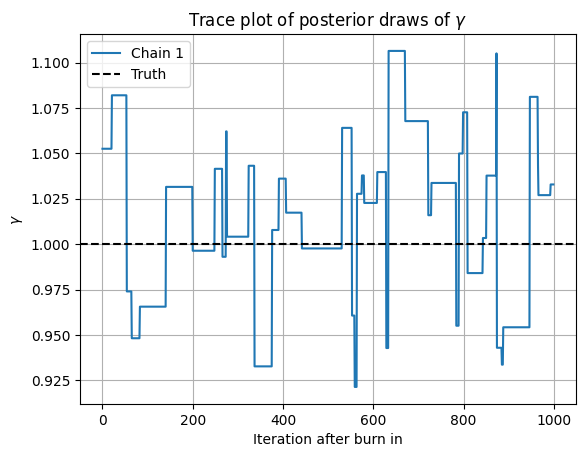

In [17]:
fig, ax = plt.subplots(1,1)
ax.plot(gamma_store_all[1], label = 'Chain 1')
plt.axhline(gamma_true, color="black", linestyle="--", label='Truth')

ax.set(xlabel = 'Iteration after burn in', ylabel = r'$\gamma$',
       title= r'Trace plot of posterior draws of $\gamma$')
plt.legend()
ax.grid()

#### Lognormal jumping distribution
##### Implementation

Alpha is the same as above as J is also symetric in this case. 

In [18]:
def mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep):
    """ MCMC algorithm with lognormal jumping distribution to estimate posterior of Cauchy scale parameter.
    
    Keywords:
        x (array): data.
        mu (float): Cauchy location parameter.
        gamma (float): Cauchy scale parameter.
        alpha0 (float): Gamma shape, gamma ~ Gamma(alpha0, beta0).
        beta0 (float): Gamma rate, gamma ~ Gamma(alpha0, beta0).
        rho (float): step size.
        n_burn (int): burn in draws.
        n_keep (int): number of draws to keep after burn-in. 
    
    Returns:
        gamma_store (array): gamma draws.
        accept_store (array): accept flags.
    """
    
    ###
    #ADD YOUR CODE HERE.
    ###
    j = 0
    old_gamma = gamma 
    gamma_store = []
    accept_store = []
    while j < n_burn: 
        new_gamma = np.random.lognormal(np.log(old_gamma) - 0.5 * rho**2, rho)
        alpha = np.prod(old_gamma*(1+((x - mu)/old_gamma)**2)/(new_gamma*(1+((x - mu)/new_gamma)**2))) * new_gamma**(alpha0-1)* np.exp(-new_gamma*beta0) / ( (old_gamma**(alpha0-1))*np.exp(-old_gamma*beta0))
        r = np.random.uniform()
        if r <= alpha :
            accepted = True 
            old_gamma = new_gamma 
        else: 
            accepted = False 
        j+=1
    
    j=0
    while j < n_keep:
        new_gamma = np.random.lognormal(np.log(old_gamma) - 0.5 * rho**2, rho)
        # J(theta|theta*) =   as J = logNormal(theta, rho**2)
        # so J(theta|theta*) / J(theta* / theta) = 1
        # p(theta|alpha0, beta0) = theta**(alpha-1) * exp(-theta/beta) / (f_Gamma(alpha) * beta**alpha) when theta ~ Gamma(alpha, beta)
        # p(xi | mu, gamma) = 1/(pi*gamma*(1+((xi-mu)/gamma)**2) when xi ~ Cauchy(mu, gamma)
        # p(theta|x) / p(theta*|x) = prod(1+((x - mu)/theta)**2)/(1+((x - mu)/theta*)**2)) * (theta*)**(alpha0-1)/(theta)**(alpha0-1)*np.exp(-theta*/beta0 + theta/beta0)
        alpha = np.prod(old_gamma*(1+((x - mu)/old_gamma)**2)/(new_gamma*(1+((x - mu)/new_gamma)**2))) * new_gamma**(alpha0-1)* np.exp(-new_gamma*beta0) / ( (old_gamma**(alpha0-1))*np.exp(-old_gamma*beta0))
        r = np.random.uniform()
        if r <= alpha :
            accepted = True 
            old_gamma = new_gamma 
        else: 
            accepted = False 
        gamma_store.append(old_gamma)
        accept_store.append(accepted)
        j+=1
    
    gamma_store = np.array(gamma_store)
    accept_store = np.array(accept_store)
    return gamma_store, accept_store     

In [19]:
mu = 1
gamma = 0.1
alpha0 = 0.001
beta0 = 0.001
rho = 0.001
n_burn = 1000
n_keep = 1000

gamma_store, accept_store = mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)

In [20]:
gamma_store.mean()

0.14559834390765444

In [21]:
gamma_store.std()

0.009296298638116441

In [22]:
accept_store.mean()

0.8

In [23]:
rhat_n_eff(gamma_store)

(2.555504670366017, 1.4140888953830353)

In [24]:
rho_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.5, 1]

gamma_store_all = {}
gamma_mean = []
gamma_std = []
gamma_accept = []
gamma_rhat = []
gamma_n_eff = []

for rho in rho_test:
    gamma_store, accept_store = mcmc_lognormal(x, mu, gamma, alpha0, beta0, rho, n_burn, n_keep)
    rhat, n_eff = rhat_n_eff(gamma_store)
    
    gamma_store_all[rho] = gamma_store
    gamma_mean.append(gamma_store.mean())
    gamma_std.append(gamma_store.std())
    gamma_accept.append(accept_store.mean())
    gamma_rhat.append(rhat)
    gamma_n_eff.append(n_eff)

In [25]:
results = pd.DataFrame(
    data={
        'rho': rho_test,
        'Post. mean': gamma_mean,
        'Post. std.': gamma_std,
        'Acceptance ratio': gamma_accept,
        'Rhat': gamma_rhat,
        'n_eff': gamma_n_eff
    }
)
results

,rho,Post. mean,Post. std.,Acceptance ratio,Rhat,n_eff
0,0.00001,0.099991,0.000006,0.997,1.121759,7.728876
1,0.00010,0.100790,0.000174,0.968,2.404796,1.461697
2,0.00100,0.143492,0.009156,0.777,2.787986,1.344180
3,0.01000,1.002693,0.046611,0.915,0.999966,21.167074
4,0.10000,1.009015,0.042018,0.453,1.001678,257.565365
5,0.15000,1.009761,0.043622,0.325,1.001735,142.356635
6,0.20000,1.004820,0.046223,0.266,1.020884,96.711578
7,0.25000,1.011663,0.041480,0.211,1.001855,125.231972
8,0.50000,1.003202,0.047745,0.099,1.016543,71.910138
9,1.00000,1.004081,0.038129,0.041,1.044833,23.845233


##### Trace plot

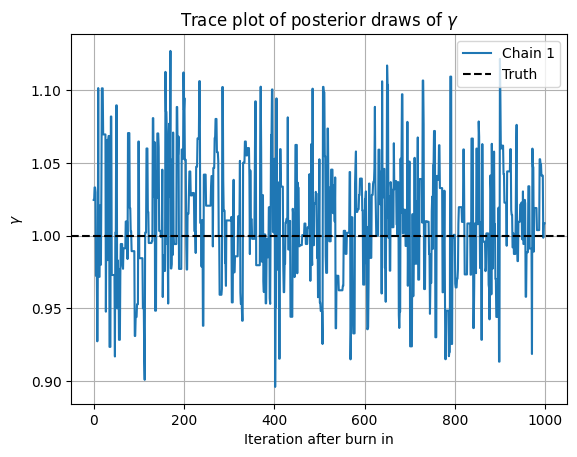

In [26]:
fig, ax = plt.subplots(1,1)
ax.plot(gamma_store_all[0.1], label = 'Chain 1')
plt.axhline(gamma_true, color="black", linestyle="--", label='Truth')

ax.set(xlabel = 'Iteration after burn in', ylabel = r'$\gamma$',
       title= r'Trace plot of posterior draws of $\gamma$')
plt.legend()
ax.grid()